# Visualise GWAS output

In [1]:
library(readr)

# Construct the file path using environment variable
genomics_data_base <- Sys.getenv("GENOMICS_DATA_BASE")
file_path <- file.path(genomics_data_base, "annotations", "s_aureus", "gene_sequences", "esxd_gene", "mortality_snps.plot")

# Read the file, skipping comment lines
plot.df <- read_tsv(
  file_path,
  comment = "#",
  col_names = c("CHR", "SNP", "BP", "minLOG10_p", "log10_p", "r2")
)

plot.df$p <- 10^(-plot.df$log10_p)
plot.df$SNP <- paste(plot.df$CHR, plot.df$BP, sep = "_")

head(plot.df)

Rows: 16 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): SNP
dbl (5): CHR, BP, minLOG10_p, log10_p, r2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


CHR,SNP,BP,minLOG10_p,log10_p,r2,p
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1_5,5,0.546682,0.546682,0,0.2839998
1,1_9,9,0.000000,0.000000,0,1.0000000
1,1_57,57,0.000000,0.000000,0,1.0000000
1,1_66,66,1.281500,1.281500,0,0.0522998
1,1_102,102,0.000000,0.000000,0,1.0000000
1,1_108,108,0.000000,0.000000,0,1.0000000


In [2]:
# Bonferroni correction

p.value.cutoff <- -log10(0.05/nrow(plot.df))
p.value.cutoff

[1] 2.50515

In [3]:
# Assuming you have a vector of p-values called 'p_values'
# and a desired significance level 'alpha'
p_values <- plot.df$p
alpha <- 0.05

# Use the p.adjust function with method=["bonferroni", "holm", "hochberg", "hommel", "BH", "BY"]
adjusted_p_values <- p.adjust(p_values, method = "bonferroni")

# Compare adjusted p-values with alpha
significant <- adjusted_p_values < alpha

signif.snps <- plot.df$SNP[significant]

# length(signif.snps)
# print(length(signif.snps))
# print(adjusted_p_values)



For example usage please run: vignette('qqman')



Citation appreciated but not required:



Turner, (2018). qqman: an R package for visualizing GWAS results using Q-Q and manhattan plots. Journal of Open Source Software, 3(25), 731, https://doi.org/10.21105/joss.00731.





ERROR: Error in manhattan(plot.df, chr = "CHR", bp = "BP", snp = "SNP", p = "p", : non-numeric argument to binary operator


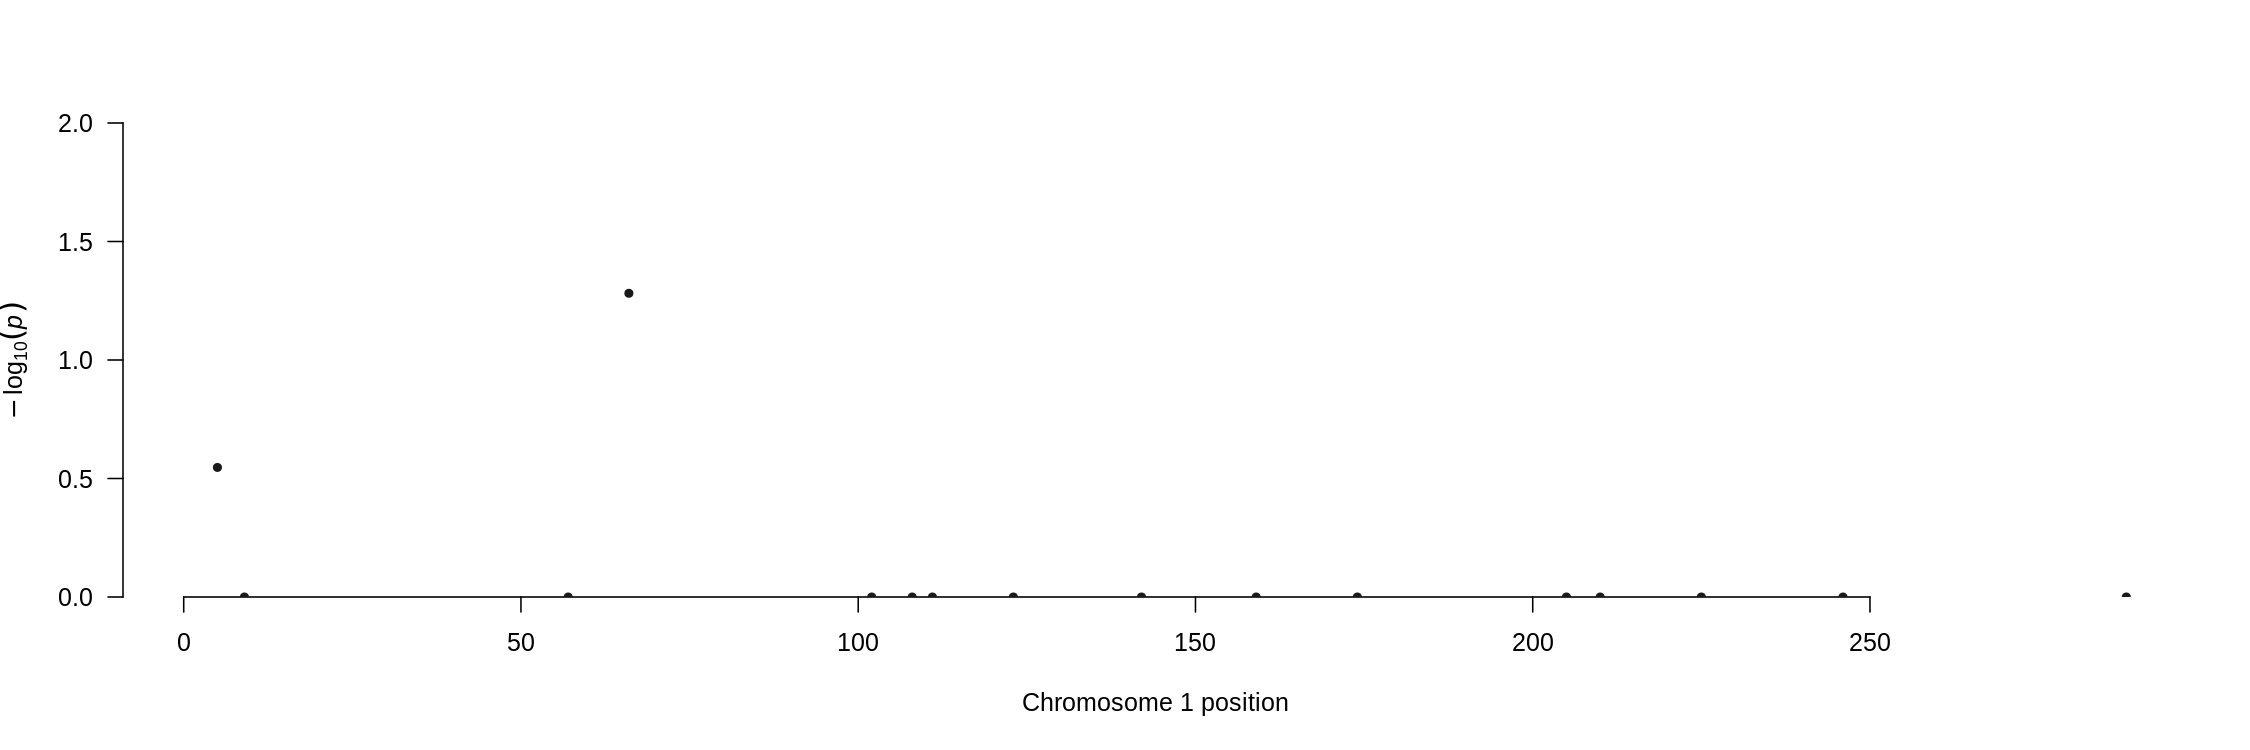

In [4]:
library(qqman)


# signif.snps <- plot.df$SNP[plot.df$log10_p > 1.301]

options(repr.plot.width = 15, repr.plot.height = 5, repr.plot.res = 150)
par(bg = "white")
manhattan(
    plot.df,
    chr="CHR",
    bp="BP",
    snp="SNP",
    p="p",
    highlight = signif.snps
    ) +
    abline(h = p.value.cutoff, col = "red", lty = 2)

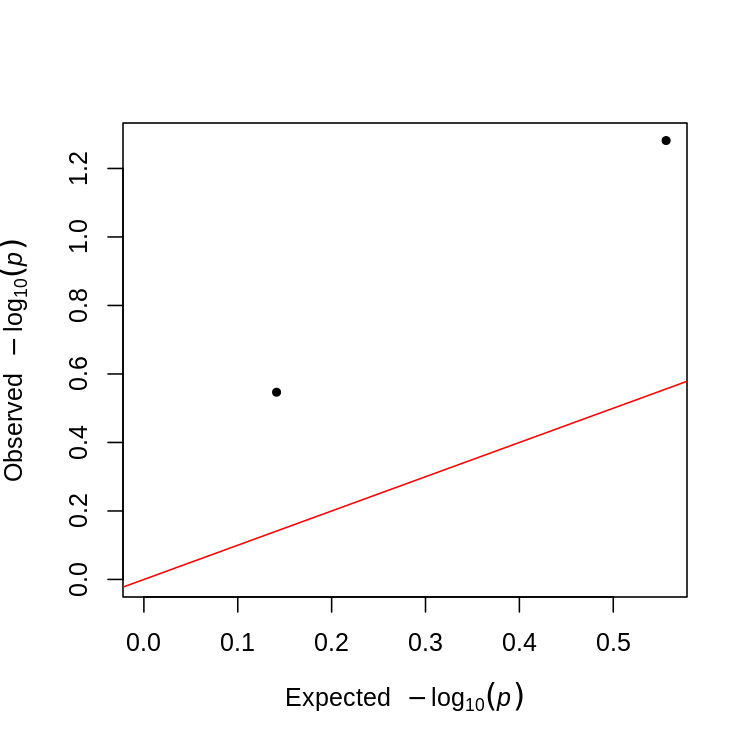

In [5]:
library(qqman)


options(repr.plot.width = 5, repr.plot.height = 5, repr.plot.res = 150)
par(bg = "white")
qq(plot.df$p)